# feature selection 1

## curse of dimensionality

The "curse of dimensionality" refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces. Key points include:

1. **Increased Volume**: As the number of dimensions increases, the volume of the space increases exponentially. This means that data points become sparse, making it difficult to find patterns or clusters.
2. **Distance Metrics**: In high-dimensional spaces, the concept of distance becomes less meaningful. Distances between points tend to converge, making it hard to distinguish between close and far points.
3. **Overfitting**: High-dimensional data can lead to overfitting in machine learning models, as the model may capture noise instead of the underlying pattern.
4. **Computational Complexity**: The computational cost of processing high-dimensional data increases significantly, requiring more resources and time.

### Illustration with Data and Code

Let's illustrate the curse of dimensionality with a simple example using Python and scikit-learn.

#### Step-by-Step Plan:
1. Generate random data in 2D and 10D.
2. Calculate and compare the distances between points in both spaces.
3. Visualize the data and distances.



Mean distance in 2D: 0.49957630382472396
Mean distance in 10D: 1.2655965087564176


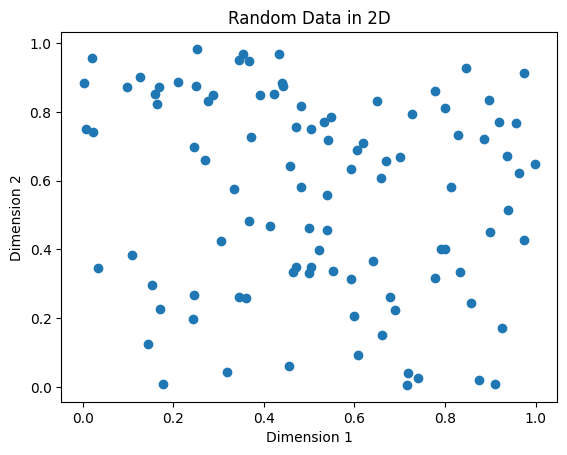

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Generate random data in 2D
data_2d = np.random.rand(100, 2)

# Generate random data in 10D
data_10d = np.random.rand(100, 10)

# Calculate pairwise distances in 2D
distances_2d = euclidean_distances(data_2d)
mean_distance_2d = np.mean(distances_2d)

# Calculate pairwise distances in 10D
distances_10d = euclidean_distances(data_10d)
mean_distance_10d = np.mean(distances_10d)

print(f"Mean distance in 2D: {mean_distance_2d}")
print(f"Mean distance in 10D: {mean_distance_10d}")

# Visualize the 2D data
plt.scatter(data_2d[:, 0], data_2d[:, 1])
plt.title("Random Data in 2D")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()



### Explanation:
1. **Data Generation**: We generate random data points in 2D and 10D spaces.
2. **Distance Calculation**: We calculate the pairwise Euclidean distances between points in both spaces.
3. **Comparison**: We compare the mean distances to illustrate how distances become less meaningful in higher dimensions.
4. **Visualization**: We plot the 2D data to visualize the distribution of points.

This code demonstrates how the curse of dimensionality affects distance metrics and data sparsity in high-dimensional spaces.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [6]:
# Load the data
ansur_f = pd.read_csv('ANSUR_II_FEMALE.csv')
ansur_m = pd.read_csv('ANSUR_II_MALE.csv')

# print shapes
print(ansur_f.shape)
print(ansur_m.shape)

# combine datasets
ansur_df = pd.concat([ansur_f, ansur_m])
print(ansur_df.shape)

(1986, 99)
(4082, 99)
(6068, 99)


In [7]:
# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis=1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"{X_test.shape[0]} rows in test set vs. {X_train.shape[0]} in training set, {X_test.shape[1]} Features.")

1821 rows in test set vs. 4247 in training set, 98 Features.


In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# drop non-numeric columns
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")




98.7% accuracy on test set vs. 99.0% on training set


# removing features

The above is overfitting - there are 90+ features (columns). 

Now we will remove all but one features which is drastic, but the feature still has value in predicting gender.

In [11]:
# keep only 'neckcircumferencebasee' column
X = ansur_df[['neckcircumferencebase']]

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# fit svc
svc = SVC()
svc.fit(X_train, y_train)

# calculate accuracy
accuracy_test = accuracy_score(y_test, svc.predict(X_test))
accuracy_train = accuracy_score(y_train, svc.predict(X_train))

print(f"{accuracy_test:.1%} accuracy on test set vs. {accuracy_train:.1%} on training set")

93.4% accuracy on test set vs. 93.4% on training set


The model is still very good at predicting with just one feature. 

It is also possible to have the scenario where the model is significantly better with 1 feature than with 90+ features. This is because the 1 feature is very predictive of the target variable, while the other features are not, and overall predictability is reduced by including them.  The curse of dimensionality is a factor here.